# 뉴럴 네트워크 (공기 오염 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/pollution_dataset.csv

--2025-01-02 08:34:31--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/pollution_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242391 (237K) [text/plain]
Saving to: ‘pollution_dataset.csv’

pollution_dataset.c 100%[===================>] 236.71K  --.-KB/s    in 0.05s   

2025-01-02 08:34:31 (4.42 MB/s) - ‘pollution_dataset.csv’ saved [242391/242391]



In [ ]:
df = pd.read_csv('pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.shape

(5000, 10)

In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air_Quality,0


## 데이터 분리

In [ ]:
x = df.drop('Air_Quality', axis=1)
y = df['Air_Quality']

y.value_counts()

,count
Air_Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 학습
ss.fit(x_train)
# 데이터 변경
x_train_s = ss.transform(x_train)
x_test_s = ss.transform(x_test)

## 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_test_e = le.transform(y_test)

In [ ]:
y_train_e

array([1, 0, 3, ..., 3, 0, 1])

In [ ]:
y_test_e

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

In [ ]:
le.classes_

array(['Good', 'Hazardous', 'Moderate', 'Poor'], dtype=object)

## 원핫 인코딩

In [ ]:
from keras.utils import to_categorical
y_train_o = to_categorical(y_train_e)
y_test_o = to_categorical(y_test_e)

y_train_o[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
type(x_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train_s.shape

(4000, 9)

## 모델 생성

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(units = 16, activation='relu'),
    keras.layers.Dense(units = 8, activation='relu'),
    keras.layers.Dense(units = 4, activation='softmax') # 다중 분류 -> 클래스의 개수만큼 최종 출력 개수
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # 분류 -> accuracy
    )

In [ ]:
EPOCHS = 300
BATCHSIZE = 32

history = model.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4272 - loss: 1.3512 - val_accuracy: 0.5350 - val_loss: 1.0229
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5873 - loss: 0.9269 - val_accuracy: 0.6963 - val_loss: 0.7719
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.7126 - val_accuracy: 0.7750 - val_loss: 0.5804
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.5330 - val_accuracy: 0.8625 - val_loss: 0.4115
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3715 - val_accuracy: 0.9100 - val_loss: 0.3180
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.2963 - val_accuracy: 0.9212 - val_loss: 0.2684
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2432 - val_accuracy: 0.9275 - val_loss: 0.2346
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.2274 - val_accu

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

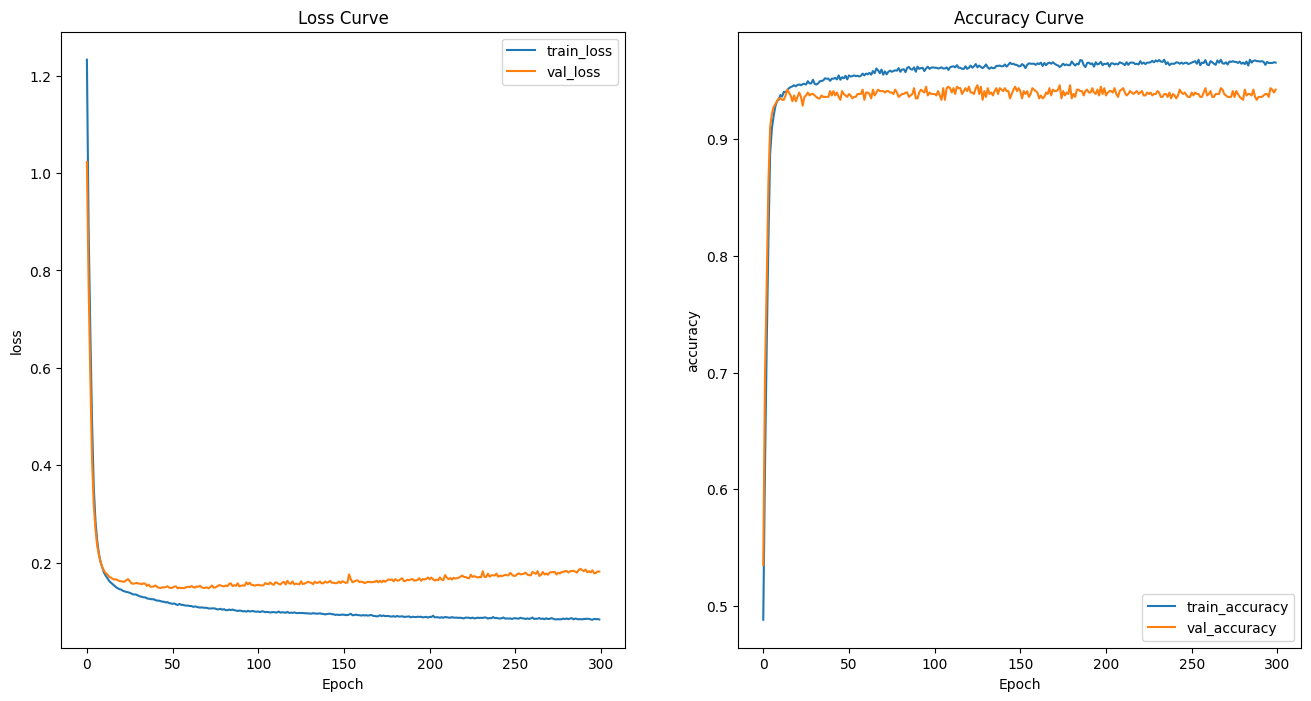

In [ ]:
plot_history(history)

## 테스트

In [ ]:
y_pred = model.predict(x_test_s)
y_pred[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.8455095e-27, 9.8454422e-01, 6.2904204e-12, 1.5455794e-02],
       [9.9999994e-01, 2.7733579e-35, 1.6251427e-11, 0.0000000e+00],
       [7.4243866e-02, 3.4278715e-11, 9.2575604e-01, 1.6092518e-07],
       [2.8532652e-19, 7.8498411e-01, 1.0348886e-07, 2.1501571e-01],
       [9.9999994e-01, 1.1832193e-31, 2.2350827e-17, 0.0000000e+00]],
      dtype=float32)

In [ ]:
y_test_o[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
y_pred = np.argmax(y_pred, axis=1) # 가장 큰 값을 가지는 인덱스

In [ ]:
y_test_e

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

In [ ]:
y_pred

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 1, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 2, 3, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 3,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

## 평가지표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.9520, prec: 0.9352, recall: 0.9286, f1: 0.9314


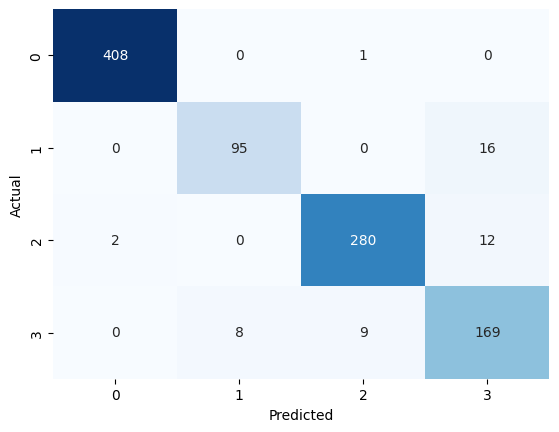

In [ ]:
print_metrics(y_test_e, y_pred)